In [2]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from keras.models import load_model
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error as mse

In [3]:
dfbv = pd.read_pickle('bit_price&vader_firstclean.pkl')

In [4]:
dfbv

dfbv = dfbv.drop(columns = ['unix', 'symbol', 'pos', 'neu', 'neg'])

In [5]:
# The dataset contains all price related variables for Bitcoin and the average compound sentiment score for that day

dfbv


,open,high,low,close,Volume BTC,Volume USD,compound
2022-05-01,37638.78,38672.20,37400.00,38488.34,1248.042690,4.803509e+07,0.126698
2022-04-30,38599.30,38786.95,37597.36,37639.80,728.279620,2.741230e+07,0.118325
2022-04-29,39753.28,39923.61,38174.27,38593.42,1600.899167,6.178417e+07,0.130839
2022-04-28,39254.40,40387.00,38880.44,39754.20,1842.005084,7.322744e+07,0.139122
2022-04-27,38105.68,39494.73,37885.75,39256.05,1769.009307,6.944432e+07,0.141789
2022-04-26,40452.52,40800.00,37701.00,38137.67,2909.722520,1.109700e+08,0.150431
2022-04-25,39464.67,40602.85,38202.91,40441.11,2220.044028,8.978104e+07,0.139021
2022-04-24,39438.51,39944.65,38987.00,39467.40,663.704172,2.619468e+07,0.168375
2022-04-23,39700.55,39983.98,39301.00,39421.59,398.244488,1.569943e+07,0.155180
2022-04-22,40497.00,40808.66,39197.64,39726.03,2136.999771,8.489452e+07,0.139239


In [10]:
#Scaling the data
scaler = MinMaxScaler()
scaler = scaler.fit(dfbv)
dfsc = scaler.transform(dfbv)

In [11]:
dfsc

array([[0.        , 0.        , 0.        , 0.08641614, 0.32583886,
        0.28192815, 0.65199211],
       [0.09781014, 0.01200088, 0.02068364, 0.        , 0.13389071,
        0.10712622, 0.58553323],
       [0.21532038, 0.13087599, 0.08114473, 0.09711759, 0.45614851,
        0.39846748, 0.68486127],
       [0.16451923, 0.17933862, 0.15515247, 0.21533257, 0.54518876,
        0.49546234, 0.7506084 ],
       [0.04754461, 0.08602251, 0.05090737, 0.16460048, 0.51823147,
        0.46339603, 0.77178296],
       [0.28652427, 0.22253132, 0.03154528, 0.05070357, 0.93949608,
        0.81537437, 0.84037622],
       [0.18593111, 0.20191282, 0.08414624, 0.28528815, 0.68479828,
        0.63577323, 0.7498123 ],
       [0.18326723, 0.13307641, 0.16632012, 0.18612457, 0.11004304,
        0.09680547, 0.98281246],
       [0.20995087, 0.13718965, 0.19922782, 0.18145924, 0.01200896,
        0.00784616, 0.87807596],
       [0.29105369, 0.22343701, 0.18839553, 0.21246371, 0.6541301 ,
        0.59435428, 0.7

In [98]:
#So far I've only experimented with different window sizes and the differences are significant -best size is 3. Larger sizes decrease performance
window_size = 3
X=[]
y=[]

for i in range(len(dfsc)-window_size):
    row = [r for r in dfsc[i:i+window_size]]
    X.append(row)
    label = dfsc[i+window_size][3]
    y.append(label)


X = np.array(X)
y = np.array(y)

In [99]:
print(X.shape)
print(y.shape)

(35, 3, 7)
(35,)


In [35]:
X

array([[[0.        , 0.        , 0.        , ..., 0.32583886,
         0.28192815, 0.65199211],
        [0.09781014, 0.01200088, 0.02068364, ..., 0.13389071,
         0.10712622, 0.58553323],
        [0.21532038, 0.13087599, 0.08114473, ..., 0.45614851,
         0.39846748, 0.68486127],
        ...,
        [0.18326723, 0.13307641, 0.16632012, ..., 0.11004304,
         0.09680547, 0.98281246],
        [0.20995087, 0.13718965, 0.19922782, ..., 0.01200896,
         0.00784616, 0.87807596],
        [0.29105369, 0.22343701, 0.18839553, ..., 0.6541301 ,
         0.59435428, 0.75154149]],

       [[0.09781014, 0.01200088, 0.02068364, ..., 0.13389071,
         0.10712622, 0.58553323],
        [0.21532038, 0.13087599, 0.08114473, ..., 0.45614851,
         0.39846748, 0.68486127],
        [0.16451923, 0.17933862, 0.15515247, ..., 0.54518876,
         0.49546234, 0.7506084 ],
        ...,
        [0.20995087, 0.13718965, 0.19922782, ..., 0.01200896,
         0.00784616, 0.87807596],
        [0.2

In [36]:
y

array([0.28830774, 0.38048299, 0.39371417, 0.32332474, 0.20892371,
       0.2806605 , 0.29771988, 0.23644726, 0.35725205, 0.2502905 ,
       0.19197636, 0.45767845, 0.52224971, 0.47359212, 0.5921778 ,
       0.56539973, 0.80076849, 0.91233223, 0.89230724, 0.8331081 ,
       0.88275863, 0.80224926, 0.96018527, 1.        , 0.96877046,
       0.93944128, 0.70228012, 0.68037922])

In [100]:
# Train-test & validation split
X_train, y_train = X[:20], y[:20]
X_val, y_val = X[20:25], y[20:25]
X_test, y_test = X[25:], y[25:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((20, 3, 7), (20,), (5, 3, 7), (5,), (10, 3, 7), (10,))

In [101]:
model4 = Sequential()
model4.add(InputLayer((3, 7)))  # 3 time steps 7 vars
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model4.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 64)                18432     
                                                                 
 dense_16 (Dense)            (None, 8)                 520       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18,961
Trainable params: 18,961
Non-trainable params: 0
_________________________________________________________________


Epoch 1/500
2/2 [==============================] - 1s 269ms/step - loss: 0.0750 - root_mean_squared_error: 0.2739 - val_loss: 0.4222 - val_root_mean_squared_error: 0.6497
Epoch 2/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0718 - root_mean_squared_error: 0.2679 - val_loss: 0.4117 - val_root_mean_squared_error: 0.6417
Epoch 3/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0687 - root_mean_squared_error: 0.2621 - val_loss: 0.4015 - val_root_mean_squared_error: 0.6336
Epoch 4/500
2/2 [==============================] - 0s 18ms/step - loss: 0.0656 - root_mean_squared_error: 0.2562 - val_loss: 0.3914 - val_root_mean_squared_error: 0.6256
Epoch 5/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0628 - root_mean_squared_error: 0.2506 - val_loss: 0.3816 - val_root_mean_squared_error: 0.6178
Epoch 6/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0599 - root_mean_squared_error: 0.2448 - val_loss: 0.3722 - val_root_mean_s

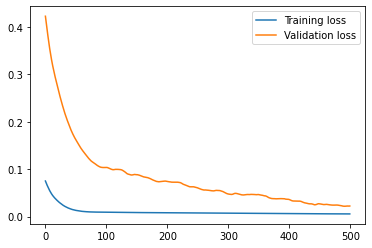

In [102]:
 #fit the model
history = model4.fit(X_train, y_train, epochs=500, batch_size=16, validation_data=(X_val,y_val), verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [103]:
# Training data predictions & plot
train_predictions = model4.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

1/1 [==============================] - 0s 203ms/step


,Train Predictions,Actuals
0,0.147072,0.215333
1,0.189450,0.164600
2,0.198388,0.050704
3,0.227335,0.285288
4,0.226093,0.186125
5,0.239361,0.181459
6,0.225078,0.212464
7,0.238669,0.288308
8,0.309867,0.380483
9,0.367086,0.393714


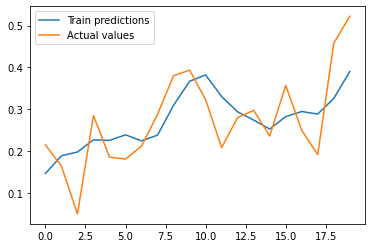

In [104]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'], label='Train predictions')
plt.plot(train_results['Actuals'], label='Actual values')
plt.legend()

In [105]:
#Validation data predictions & plot
val_predictions = model4.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
val_results

1/1 [==============================] - 0s 16ms/step


,Val Predictions,Actuals
0,0.424861,0.473592
1,0.467530,0.592178
2,0.498293,0.565400
3,0.595524,0.800768
4,0.694239,0.912332


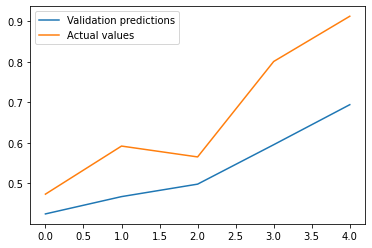

In [106]:
plt.plot(val_results['Val Predictions'], label='Validation predictions')
plt.plot(val_results['Actuals'], label='Actual values')
plt.legend()

In [107]:
# Test data predictions & plot
test_predictions = model4.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

1/1 [==============================] - 0s 16ms/step


,Test Predictions,Actuals
0,0.762616,0.892307
1,0.757645,0.833108
2,0.747831,0.882759
3,0.736205,0.802249
4,0.760217,0.960185
5,0.803437,1.000000
6,0.840067,0.968770
7,0.891529,0.939441
8,0.825545,0.702280
9,0.706855,0.680379


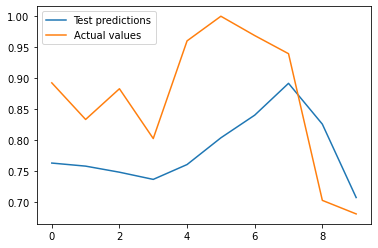

In [108]:
plt.plot(test_results['Test Predictions'], label='Test predictions')
plt.plot(test_results['Actuals'], label='Actual values')
plt.legend()

In [109]:
from sklearn.metrics import mean_squared_error as mse
# Function to return df with predicted vs actual, mse & plot
def plot_predictions1(model, X, y, start=0, end=38):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

1/1 [==============================] - 0s 0s/step


(   Predictions   Actuals
 0     0.424861  0.473592
 1     0.467530  0.592178
 2     0.498293  0.565400
 3     0.595524  0.800768
 4     0.694239  0.912332,
 0.02242103868398056)

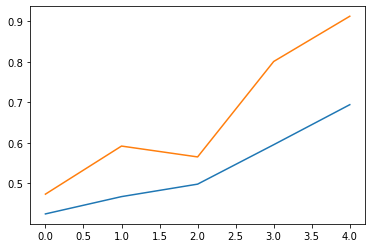

In [110]:
plot_predictions1(model4, X_val, y_val)


1/1 [==============================] - 0s 16ms/step


(   Predictions   Actuals
 0     0.762616  0.892307
 1     0.757645  0.833108
 2     0.747831  0.882759
 3     0.736205  0.802249
 4     0.760217  0.960185
 5     0.803437  1.000000
 6     0.840067  0.968770
 7     0.891529  0.939441
 8     0.825545  0.702280
 9     0.706855  0.680379,
 0.015846185044355518)

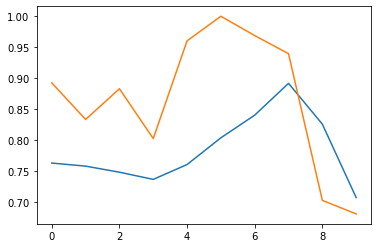

In [111]:
plot_predictions1(model4, X_test, y_test)

In [125]:

# mse, mae for training data
print('MSE: ', mean_squared_error(y_train, train_predictions))
print('MAE: ', mean_absolute_error(y_train, train_predictions))

MSE:  0.00573341748622418
MAE:  0.06348273930462689


In [126]:
# mse, mae for testing data
print('MSE: ', mean_squared_error(y_test, test_predictions))
print('MAE: ', mean_absolute_error(y_test, test_predictions))

MSE:  0.015846185044355518
MAE:  0.11290152072979928


In [127]:
# mse, mae for validation data
print('MSE: ', mean_squared_error(y_val, val_predictions))
print('MAE: ', mean_absolute_error(y_val, val_predictions))

MSE:  0.02242103868398056
MAE:  0.13276477996701982


In [128]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [129]:
MAPE(y_test,test_predictions)

12.742075996815913